# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [110]:
#let's calculate the Measurements of central tendency
x = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
def mean_function(x):
    mean = (sum(x)/len(x))
    return mean


In [111]:
x = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
mean_function(x)


3052.714285714286

In [149]:
#define variance
def variance(x):
    mean = mean_function(x)
    variance = sum([(i-mean)**2 for i in x])/(len(x)-1)
    return variance
        

In [150]:
x = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
variance(x)

214387.90476190473

In [151]:
#Standard deviation
def std_dev(x):
    #sqrt = x**(.5)
    std_dev = (variance(x))**.5
    return std_dev

In [152]:
x = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
std_dev(x)

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [153]:
from __future__ import print_function, division
import numpy as np
x = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
y = [127, 80, 105, 92, 120, 115, 93]
covar_x_y = np.cov(x,y , ddof = 1)
print(covar_x_y)

[[214387.9047619    7604.35714286]
 [  7604.35714286    290.95238095]]


In [154]:
#define covariance 
def covar(x,y):
    mean_x = mean_function(x)
    mean_y = mean_function(y)
#     x_y_covar = [(x[i] - mean_x) * (y[i] - mean_y)
#             for i in range(len(x))]
    x_y_covar = [(x[i]-mean_x)*(y[i]-mean_y) for i in range(len(x))]
    covariance = sum(x_y_covar) / (len(x_y_covar) - 1)
    return covariance

In [155]:
x = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
y = [127, 80, 105, 92, 120, 115, 93]
covar(x,y)

7604.357142857142

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [156]:
#Standard deviation of Y (SAles last week)
y = [127, 80, 105, 92, 120, 115, 93]
std_dev(y)

17.057326313123664

In [157]:
#standard dev for the previous week (question 1)
x = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
std_dev(x)

463.0204150595357

In [147]:
def corr_coef(x,y):
    covar_x_y = covar(x,y)
    std_dev_x = std_dev(x)
    std_dev_y = std_dev(y)
    corr = (covar_x_y)/(std_dev_x*std_dev_y)
    return corr

In [158]:
x = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
y = [127, 80, 105, 92, 120, 115, 93]
corr_coef(x,y)

0.9628339778148909

In [134]:
np.corrcoef(x,y)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [159]:
from __future__ import print_function, division
import pandas as pd

In [160]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

In [161]:
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [163]:
df.shape

(1310, 16)

In [162]:
df.isna().sum()

Unnamed: 0             0
pclass                 1
survived               1
name                   1
sex                    1
age                    0
sibsp                  1
parch                  1
ticket                 1
fare                   2
cabin               1015
embarked               0
boat                 824
body                1189
home.dest            565
has_cabin_number       0
dtype: int64

In [164]:
df_updated = df.drop(columns = ['cabin', 'boat','home.dest', 'body'])

In [165]:
df_updated.columns

Index(['Unnamed: 0', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked', 'has_cabin_number'],
      dtype='object')

In [166]:
df_updated.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
embarked             object
has_cabin_number      int64
dtype: object

In [168]:
df_updated.isna().sum()

Unnamed: 0          0
pclass              1
survived            1
name                1
sex                 1
age                 0
sibsp               1
parch               1
ticket              1
fare                2
embarked            0
has_cabin_number    0
dtype: int64

In [170]:
df_cleaned = df_updated.dropna()

In [171]:
df_cleaned.isna().sum()

Unnamed: 0          0
pclass              0
survived            0
name                0
sex                 0
age                 0
sibsp               0
parch               0
ticket              0
fare                0
embarked            0
has_cabin_number    0
dtype: int64

In [172]:
df_cleaned.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,1


In [173]:
def cat_to_num(x):
    if x == "female":
        return 1
    if x == "male":
        return 0

In [174]:
df_cleaned['gender'] = df['sex'].apply(cat_to_num)

/home/mishraka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [176]:
df_cleaned.columns

Index(['Unnamed: 0', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked', 'has_cabin_number', 'gender'],
      dtype='object')

In [177]:
df_cleaned.embarked

0       S
1       S
2       S
3       S
4       S
5       S
6       S
7       S
8       S
9       C
10      C
11      C
12      C
13      S
14      S
15      S
16      C
17      C
18      C
19      C
20      S
21      S
22      C
23      C
24      S
25      C
26      C
27      C
28      S
29      S
       ..
1279    S
1280    S
1281    S
1282    S
1283    S
1284    S
1285    S
1286    C
1287    S
1288    S
1289    S
1290    S
1291    S
1292    S
1293    S
1294    S
1295    S
1296    S
1297    S
1298    S
1299    C
1300    C
1301    C
1302    C
1303    C
1304    C
1305    C
1306    C
1307    C
1308    S
Name: embarked, Length: 1308, dtype: object

In [178]:
def class_to_num(x):
    if x == "S":
        return 1
    if x == "C":
        return 2

In [180]:
df_cleaned["class_num"] = df_cleaned['embarked'].apply(class_to_num)

/home/mishraka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [181]:
df_cleaned.columns

Index(['Unnamed: 0', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked', 'has_cabin_number', 'gender',
       'class_num'],
      dtype='object')

In [221]:
df_final.head()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,has_cabin_number,gender,class_num
0,1,1.0,1.0,29.0000,0.0,0.0,211.3375,1,1.0,1.0
1,2,1.0,1.0,0.9167,1.0,2.0,151.5500,1,0.0,1.0
2,3,1.0,0.0,2.0000,1.0,2.0,151.5500,1,1.0,1.0
3,4,1.0,0.0,30.0000,1.0,2.0,151.5500,1,0.0,1.0
4,5,1.0,0.0,25.0000,1.0,2.0,151.5500,1,1.0,1.0


In [222]:
df_final.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
age                 float64
sibsp               float64
parch               float64
fare                float64
has_cabin_number      int64
gender              float64
class_num           float64
dtype: object

In [223]:
df_final.shape

(1308, 10)

In [224]:
np.cov(df_final)

array([[  4382.48027951,   3120.36134488,   3118.26092361, ...,
         -3282.53775347,  -3284.92115625,  -3270.46671875],
       [  3120.36134488,   2263.78814644,   2260.27200239, ...,
         -1998.97068731,  -2001.38864897,  -1994.88284625],
       [  3118.26092361,   2260.27200239,   2257.17136111, ...,
         -1881.70929167,  -1883.99068056,  -1877.194375  ],
       ...,
       [ -3282.53775347,  -1998.97068731,  -1881.70929167, ...,
        169768.76367361, 169893.02936806, 170004.8159375 ],
       [ -3284.92115625,  -2001.38864897,  -1883.99068056, ...,
        169893.02936806, 170017.40895139, 170129.37357639],
       [ -3270.46671875,  -1994.88284625,  -1877.194375  , ...,
        170004.8159375 , 170129.37357639, 170241.97378472]])

In [228]:
df_final.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,has_cabin_number,gender,class_num
Unnamed: 0,142758.852129,284.266312,-53.841414,-1458.534777,26.066613,1.342019,-9410.735123,-95.373542,-22.422778,-29.556695
pclass,284.266312,0.702126,-0.127139,-3.974162,0.053400,0.013505,-24.227788,-0.250062,-0.049857,-0.086705
survived,-53.841414,-0.127139,0.236319,-0.305629,-0.014245,0.034690,6.146023,0.061387,0.123080,0.038937
age,-1458.534777,-3.974162,-0.305629,165.385957,-2.550069,-1.451467,114.416613,1.470661,-0.346127,0.432719
sibsp,26.066613,0.053400,-0.014245,-2.550069,1.085692,0.336944,8.641768,-0.004036,0.054595,-0.026364
parch,1.342019,0.013505,0.034690,-1.451467,0.336944,0.749654,9.928031,0.013260,0.088325,-0.009836
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,10.976961,4.600321,6.128094
has_cabin_number,-95.373542,-0.250062,0.061387,1.470661,-0.004036,0.013260,10.976961,0.174803,0.027468,0.043855
gender,-22.422778,-0.049857,0.123080,-0.346127,0.054595,0.088325,4.600321,0.027468,0.229517,0.017309
class_num,-29.556695,-0.086705,0.038937,0.432719,-0.026364,-0.009836,6.128094,0.043855,0.017309,0.176082


In [225]:
df_final.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,has_cabin_number,gender,class_num
Unnamed: 0,1.000000,0.897876,-0.293134,-0.300169,0.066211,0.004102,-0.481215,-0.603743,-0.123874,-0.184315
pclass,0.897876,1.000000,-0.312122,-0.368798,0.061162,0.018615,-0.558629,-0.713783,-0.124198,-0.243697
survived,-0.293134,-0.312122,1.000000,-0.048887,-0.028122,0.082418,0.244265,0.302031,0.528483,0.190631
age,-0.300169,-0.368798,-0.048887,1.000000,-0.190305,-0.130355,0.171892,0.273520,-0.056180,0.078372
sibsp,0.066211,0.061162,-0.028122,-0.190305,1.000000,0.373485,0.160238,-0.009264,0.109369,-0.059505
parch,0.004102,0.018615,0.082418,-0.130355,0.373485,1.000000,0.221539,0.036629,0.212934,-0.026371
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,0.507253,0.185523,0.271743
has_cabin_number,-0.603743,-0.713783,0.302031,0.273520,-0.009264,0.036629,0.507253,1.000000,0.137134,0.242988
gender,-0.123874,-0.124198,0.528483,-0.056180,0.109369,0.212934,0.185523,0.137134,1.000000,0.086879
class_num,-0.184315,-0.243697,0.190631,0.078372,-0.059505,-0.026371,0.271743,0.242988,0.086879,1.000000


In [227]:
np.corrcoef(df_final)

array([[ 1.        ,  0.99066544,  0.99144859, ..., -0.120343  ,
        -0.12034229, -0.11973371],
       [ 0.99066544,  1.        ,  0.99990917, ..., -0.101967  ,
        -0.10201566, -0.10161696],
       [ 0.99144859,  0.99990917,  1.        , ..., -0.09612611,
        -0.09617225, -0.0957621 ],
       ...,
       [-0.120343  , -0.101967  , -0.09612611, ...,  1.        ,
         0.99999993,  0.99999772],
       [-0.12034229, -0.10201566, -0.09617225, ...,  0.99999993,
         1.        ,  0.99999835],
       [-0.11973371, -0.10161696, -0.0957621 , ...,  0.99999772,
         0.99999835,  1.        ]])

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal? 

Ans: perpendicular

In [230]:
import math
#All you need is a dot product to be zero
g_ortho = np.array([1,0,-1])
h_ortho = np.array([1, math.sqrt(2), 1])
# np.linalg.norm(g_ortho), np.linalg.norm(h_ortho)
# np.cross(g_ortho, h_ortho) 
np.dot(g_ortho, h_ortho) 

0.0

In [236]:
from __future__ import print_function, division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from __future__ import print_function, division
import numpy as np

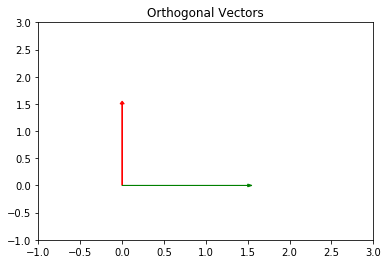

In [235]:
vector_1 = [0,1.5]
vector_2 = [1.5,0]
# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,3)          
plt.ylim(-1,3)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

No, it's not orthogonal. The lines aren't perpendicular to each other.

In [239]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])
np.dot(a,b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [246]:
c = np.array([2, -15, 6, 20])
c_norm = np.linalg.norm(c)**2
print(c_norm)

665.0


In [242]:
np.dot(c, c)

665

In [243]:
c_transpose = np.transpose(c)
print(c_transpose)

[  2 -15   6  20]


In [247]:
np.dot(c_transpose,c)

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}



\begin{align}
d = 7\begin{bmatrix}1\\0\end{bmatrix} + 12\begin{bmatrix}0\\1\end{bmatrix} = 7\hat{i}+12\hat{j}
\end{align}

\begin{align}
e = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0\end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1\end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [248]:
f = np.array([4, 12, 11, 9, 2])
f_unit = f/np.linalg.norm(f)
print(f_unit)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

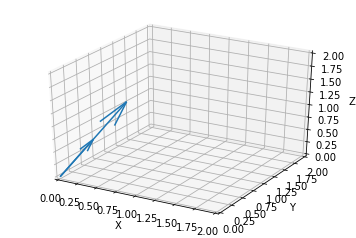

In [254]:
#Linearliy dependent
from mpl_toolkits.mplot3d import Axes3D
three_d = np.array([[0, 0, 0, .2, .4, .6]])
three = np.array([[0, 0, 0, .4, .8, 1.2]])

#X, Y, Z, U, V, W = zip(*three_d)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, .2, .4, .6, length=1)
ax.quiver(0, 0, 0, .4, .8, 1.2, length=1)
ax.set_xlim([0, 2])
ax.set_ylim([0, 2])
ax.set_zlim([0, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

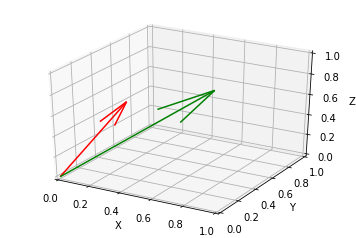

In [258]:
#linearly independent
from mpl_toolkits.mplot3d import Axes3D
three_d = np.array([[0, 0, 0, .2, .4, .6]])
three_d = np.array([[0, 0, 0, .3, .5, .7]])

#X, Y, Z, U, V, W = zip(*three_d)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, .2, .4, .6, length=1, colors = 'red')
ax.quiver(0, 0, 0, .7, .5, .8, length=1, color = 'green')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

g and h do not span the space as h is a linear combination of g (h = g*4). All their combiantions will lie on the same line

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

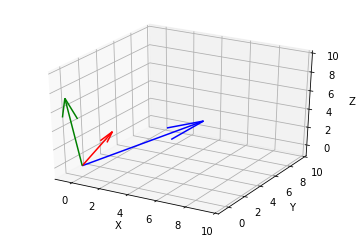

In [266]:
#linearly independent
from mpl_toolkits.mplot3d import Axes3D

#X, Y, Z, U, V, W = zip(*three_d)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, 1, 2, 3, length=1, colors = 'red')
ax.quiver(0, 0, 0, -1, 0, 7, length=1, color = 'green')
ax.quiver(0, 0, 0, 4, 8, 2, length=1, color = 'blue')
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
ax.set_zlim([-1, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



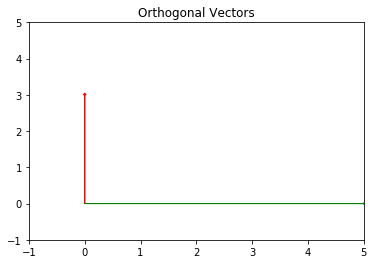

In [269]:
vector_1 = [0,3]
vector_2 = [5,0]
# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,5)          
plt.ylim(-1,5)
plt.title("Orthogonal Vectors")
plt.show()

## 6.2 What does it mean to form a basis?

Forming a basis is basically finding linearly independent vectors to span the space. 


# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [277]:
p = np.matrix([[1,2,3], [-1,0,7], [4,8,2]])
p_rank = np.linalg.matrix_rank(p)
print("The rank is:", p_rank)

The rank is: 3


## 7.2 What does the rank of a matrix tell us?

It tells us total number of indpendent rows or columns 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [280]:
v = np.array([1, 3])
w = np.array([-1, 2])
proj_w_on_l = (np.dot(w,v)/np.dot(v,v))*v
proj_w_on_l

array([0.5, 1.5])

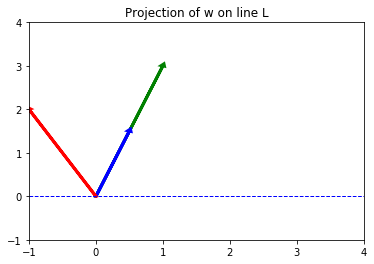

In [286]:
# Axis Bounds
plt.xlim(-1,4)          
plt.ylim(-1,4)

# Original Vector
v = [1,3] 
w = [-1,2]
proj = [0.5, 1.5]

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Projection of w on line L")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

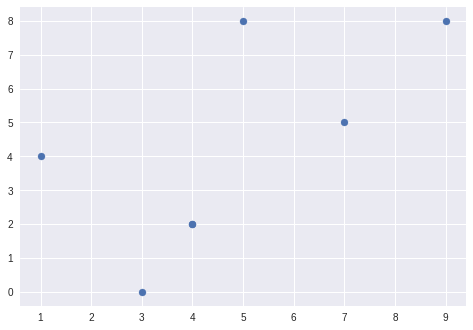

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()

In [306]:
def linear_proj(x,y, ref_vector):
    new_x = []
    new_y = []
    for i in range(len(x)):
        curr_vector = [x[i], y[i]]
        proj = np.dot(curr_vector, ref_vector)
        new_x.append(proj*ref_vector[0])
        new_y.append(proj*ref_vector[1])
    return new_x, new_y
    

In [305]:
x = [1, 4, 7, 3, 9, 4, 5 ]
y = [4, 2, 5, 0, 8, 2, 8]
sqrt_2 = 2**(0.5)
ref_vector = [1./sqrt_2,1./sqrt_2]
new_x, new_y = linear_proj(x,y,ref_vector)
print("new_x = {}".format(new_x))
print("new_y = {}".format(new_y))

new_x = [2.4999999999999996, 2.9999999999999996, 5.999999999999999, 1.4999999999999998, 8.499999999999998, 2.9999999999999996, 6.499999999999999]
new_y = [2.4999999999999996, 2.9999999999999996, 5.999999999999999, 1.4999999999999998, 8.499999999999998, 2.9999999999999996, 6.499999999999999]


In [310]:
x_new = [2.4999999999999996, 2.9999999999999996, 5.999999999999999, 1.4999999999999998, 8.499999999999998, 2.9999999999999996, 6.499999999999999]
y_new = [2.4999999999999996, 2.9999999999999996, 5.999999999999999, 1.4999999999999998, 8.499999999999998, 2.9999999999999996, 6.499999999999999]
data_1 = {"x_new": x_new, "y_new": y_new}
df_1 = pd.DataFrame(data_1)


In [312]:
df_1

,x_new,y_new
0,2.5,2.5
1,3.0,3.0
2,6.0,6.0
3,1.5,1.5
4,8.5,8.5
5,3.0,3.0
6,6.5,6.5


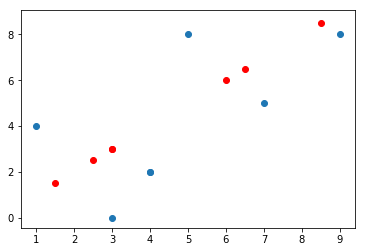

In [313]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.scatter(df_1.x_new, df_1.y_new, color = 'red')
plt.show()